# Bayesian Contextual Bandits

Notebook for analysis and simulation of Bayesian contextual bandits


## Description

TODO: explain details here

## Simulation

General simulation set up

In [1]:
import numpy as np
import scipy.stats as stats
from BayesianContextualBandits import *
from Bandit_functions import *

Simulation time and realizations

In [2]:
#Number of realizations
R=pow(10,2)
# Time instants to run
t_max=pow(10,3)

True bandit information

In [3]:
# Bandit configuration
K=3
# Context
d_context=5
context_per_action=np.array([[1,0,0,0,0],
                             [0,1,0,0,0],
                             [0,0,0,1,1]])
# Theta
theta=stats.uniform.rvs(size=(d_context,1))
# Mean is linear combination
returns_expected=context_per_action.dot(theta)
# Sigma
returns_sigma=1
reward_function={'type':'linear_gaussian', 'dist':stats.norm, 'args':(), 'kwargs':{'loc':returns_expected,'scale':returns_sigma}}

Prior for the true bandit:

In [4]:
reward_prior={'dist': 'NIG', 'alpha': 2., 'beta': 1., 'theta': np.ones((d_context,1)) , 'Sigma':np.eye(d_context) }

### Type of Bayesian Contextual bandit methods to evaluate

In [5]:
# Optimal Contextual bandit
optimal_bandit=OptimalBandit(K, reward_function)
# Probabilistic bandit
probabilistic_bandit=ProbabilisticBandit(K, reward_function)

# Bandits as a list
bandits=[optimal_bandit, probabilistic_bandit]
bandits_labels=['Optimal', 'Probabilistic']

# Monte Carlo Bayesian Contextual Bandits
M_samples=np.array([1, 100])
for n in np.arange(M_samples.size):
    bandits.append(BayesianContextualBanditMonteCarlo(K, context_per_action, reward_function, reward_prior, M_samples[n]))
    bandits_labels.append('Monte Carlo M={}'.format(M_samples[n]))
    
# Bandits colors
bandits_colors=['b', 'y', 'g', 'r']

Execute bandits

In [6]:
# Execution
bandits_returns, bandits_actions, bandits_predictive=execute_bandits(K, bandits, R, t_max)

Plot bandit results

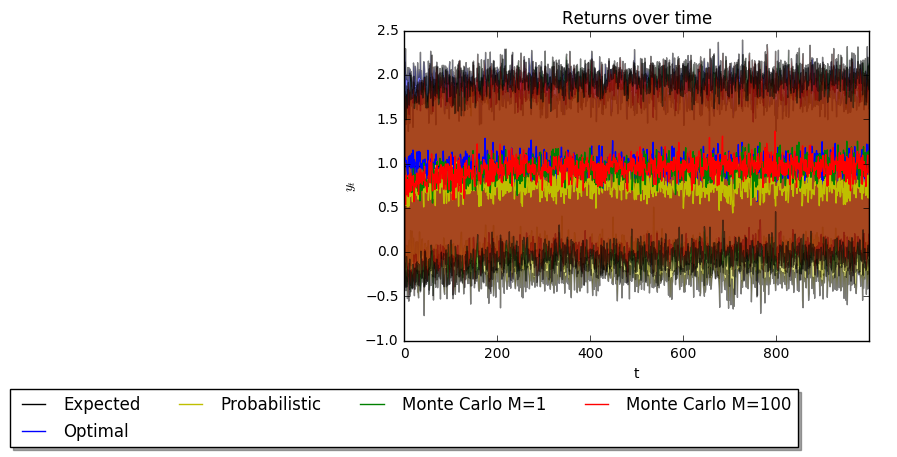

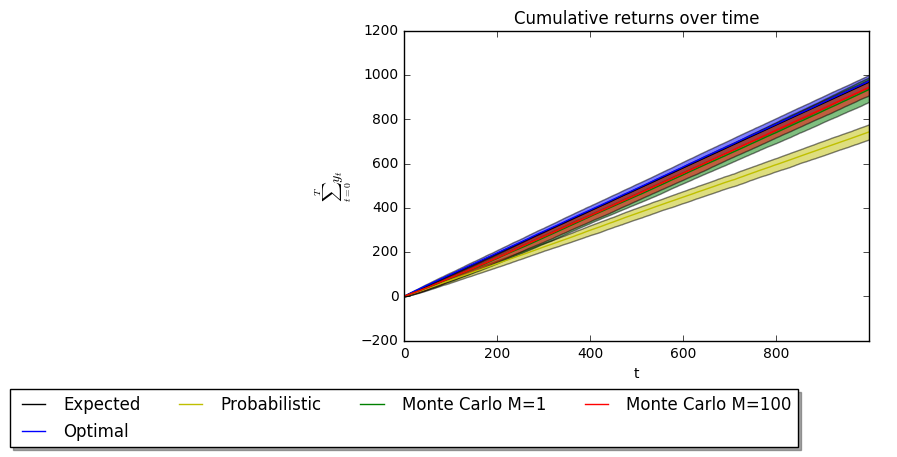

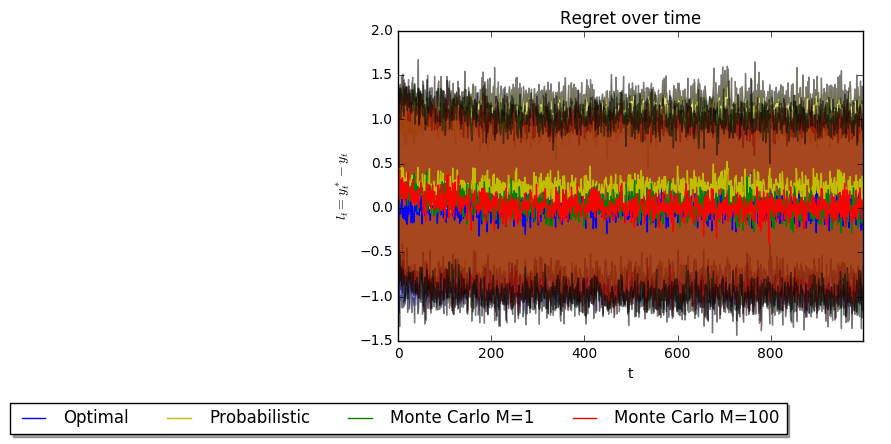

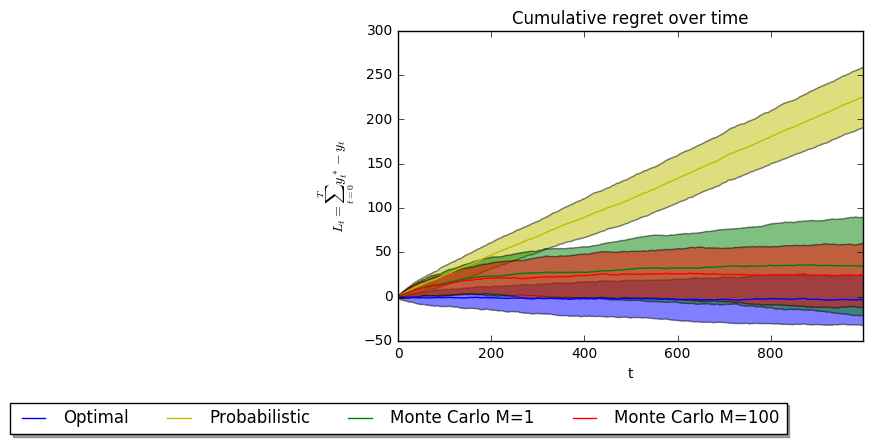

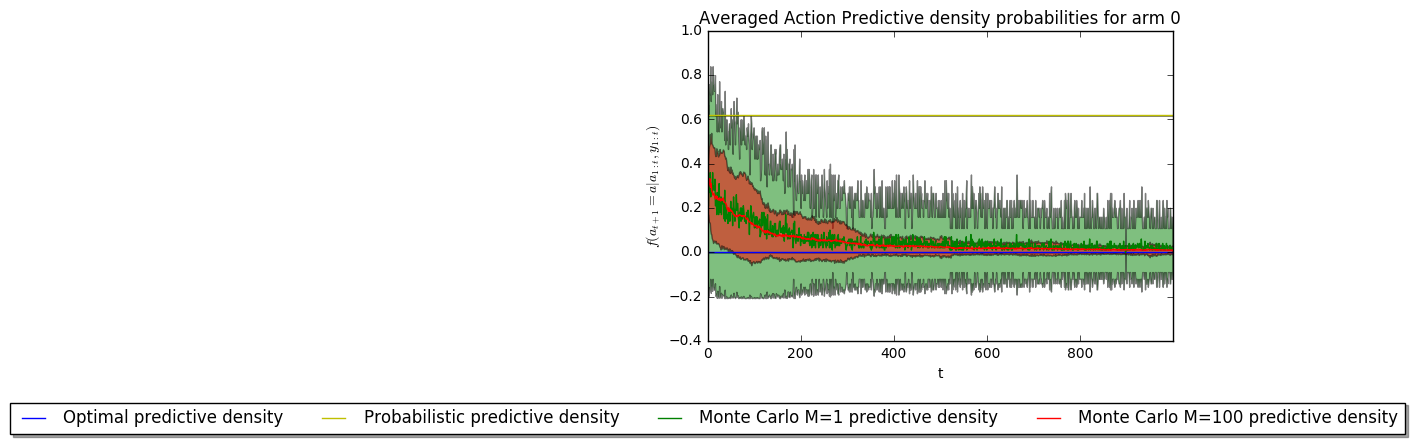

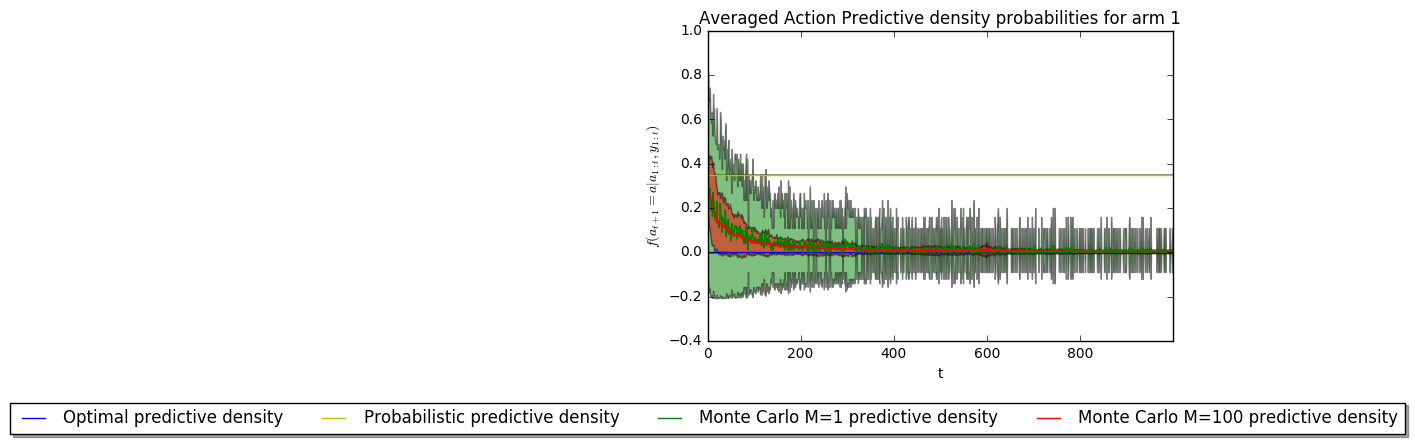

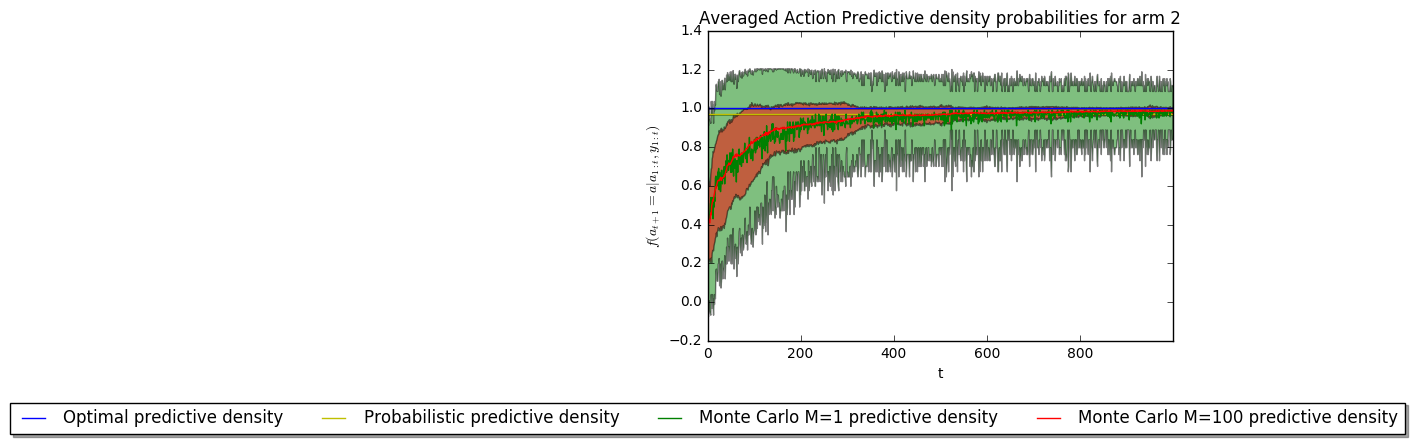

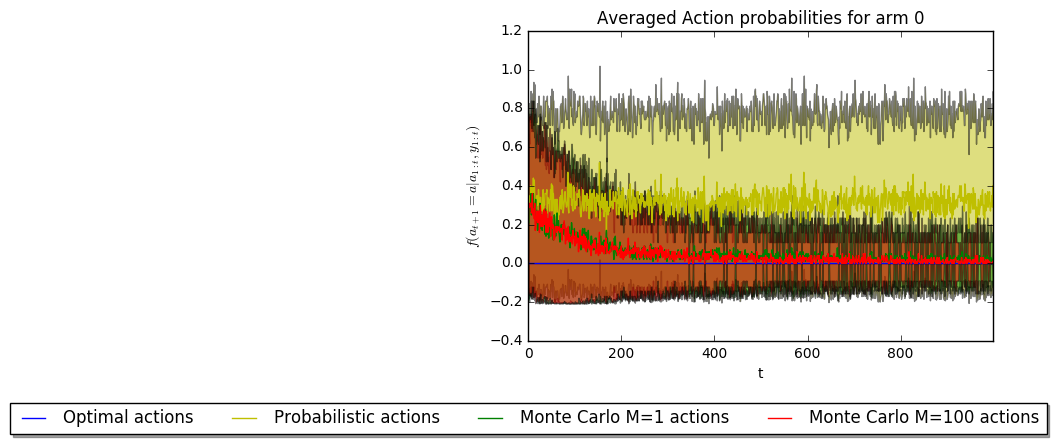

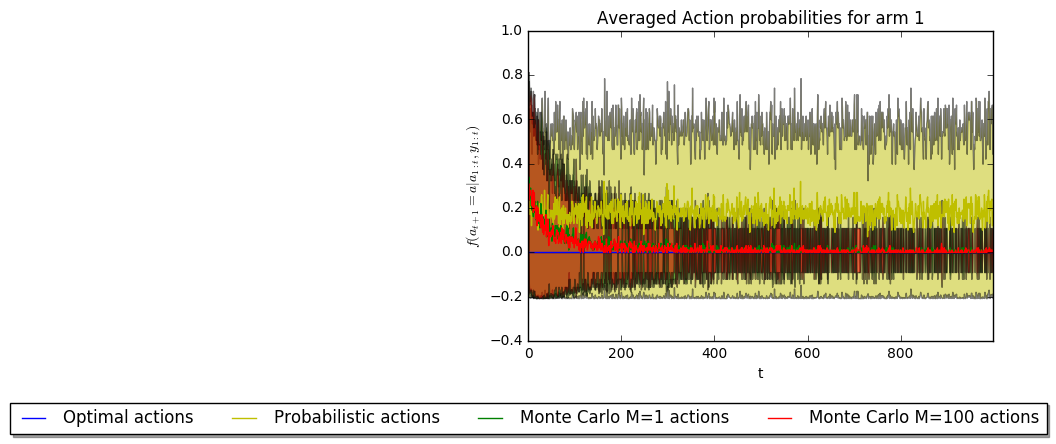

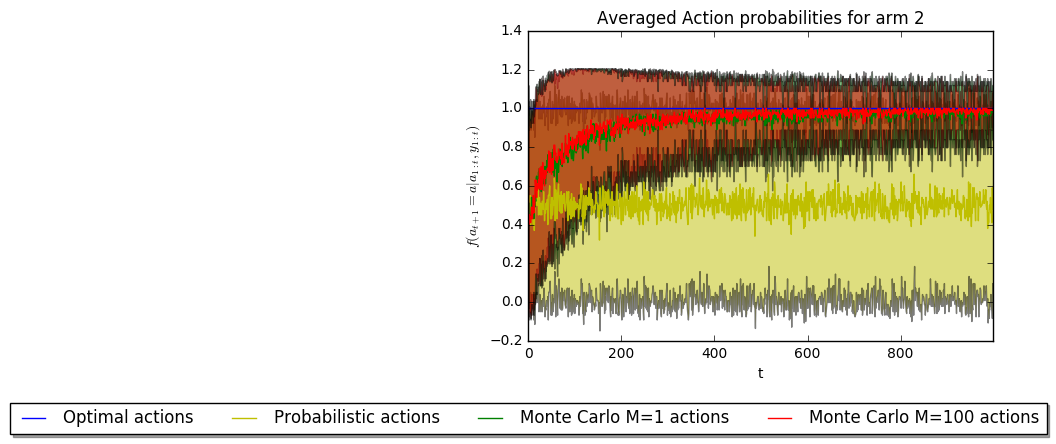

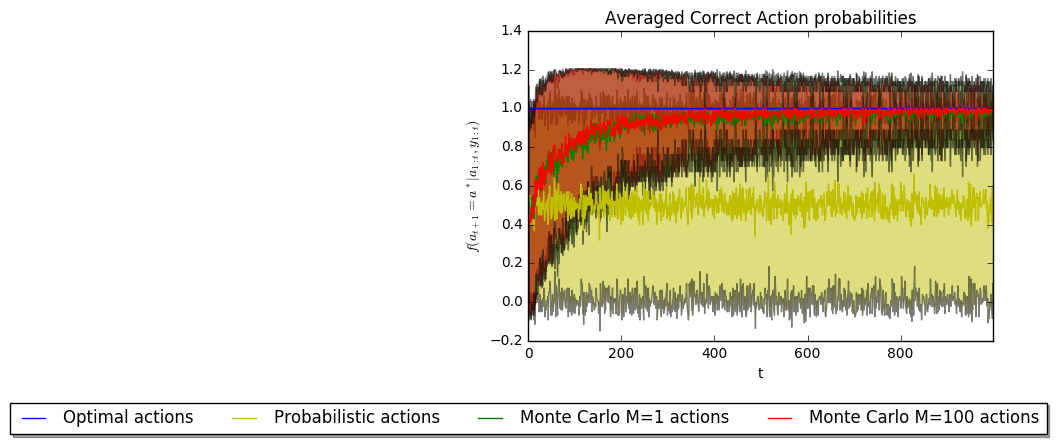

In [7]:
# Plotting time: all
t_plot=t_max
# Variance: True
plot_std=True
# Plot
plot_bandits(returns_expected, bandits_returns, bandits_actions, bandits_predictive, bandits_colors, bandits_labels, t_plot, plot_std)